In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from feature_selection import embedded_method
# plt.style.use('seaborn-colorblind')
# %matplotlib inline


## Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [3]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), 
                                                    data.target, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Lasso
Regularization with Lasso.Lasso (L1) has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model

In [5]:
# linear models benefit from feature scaling

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [6]:
# fit the LR model
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [7]:
# make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 30
selected features: 14
features with coefficients shrank to zero: 16


In [8]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean fractal dimension',
       'texture error', 'perimeter error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst radius', 'worst perimeter', 'worst compactness'],
      dtype='object')

In [9]:
# remove the features from the training and testing set

X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

X_train_selected.shape, X_test_selected.shape

((455, 14), (114, 14))

## Random Forest Importance


Feature ranking:
1. feature no:27 feature name:worst concave points (0.206316)
2. feature no:22 feature name:worst perimeter (0.147163)
3. feature no:7 feature name:mean concave points (0.100672)
4. feature no:20 feature name:worst radius (0.082449)
5. feature no:6 feature name:mean concavity (0.060420)
6. feature no:2 feature name:mean perimeter (0.048284)
7. feature no:23 feature name:worst area (0.046151)
8. feature no:3 feature name:mean area (0.038594)
9. feature no:13 feature name:area error (0.035627)
10. feature no:0 feature name:mean radius (0.030476)
11. feature no:10 feature name:radius error (0.028711)
12. feature no:26 feature name:worst concavity (0.028533)
13. feature no:12 feature name:perimeter error (0.019986)
14. feature no:21 feature name:worst texture (0.018623)
15. feature no:1 feature name:mean texture (0.013840)
16. feature no:25 feature name:worst compactness (0.013195)
17. feature no:29 feature name:worst fractal dimension (0.011840)
18. feature no:24 feature 

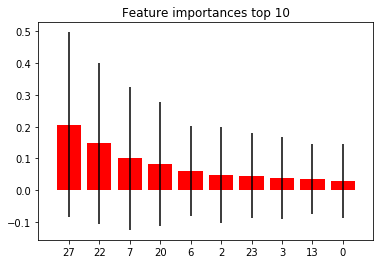

In [10]:
model = embedded_method.rf_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [11]:
# select features whose importance > threshold
from sklearn.feature_selection import SelectFromModel

# only 5 features have importance > 0.05
feature_selection = SelectFromModel(model, threshold=0.05,prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')

In [12]:
# only 12 features have importance > 2 times median
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True) 
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'radius error', 'area error', 'worst radius',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

## Gradient Boosted Trees Importance

Feature ranking:
1. feature no:27 feature name:worst concave points (0.694636)
2. feature no:23 feature name:worst area (0.131077)
3. feature no:4 feature name:mean smoothness (0.033800)
4. feature no:8 feature name:mean symmetry (0.018609)
5. feature no:22 feature name:worst perimeter (0.015998)
6. feature no:21 feature name:worst texture (0.013732)
7. feature no:2 feature name:mean perimeter (0.010792)
8. feature no:26 feature name:worst concavity (0.010138)
9. feature no:17 feature name:concave points error (0.008941)
10. feature no:13 feature name:area error (0.008934)
11. feature no:0 feature name:mean radius (0.007928)
12. feature no:12 feature name:perimeter error (0.006268)
13. feature no:18 feature name:symmetry error (0.005472)
14. feature no:3 feature name:mean area (0.005069)
15. feature no:1 feature name:mean texture (0.005034)
16. feature no:10 feature name:radius error (0.004299)
17. feature no:16 feature name:concavity error (0.003595)
18. feature no:6 feature name:mean

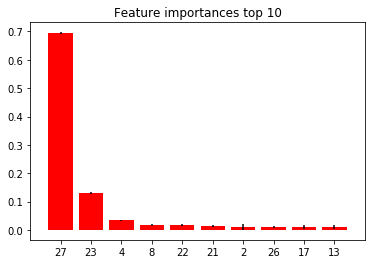

In [13]:
model = embedded_method.gbt_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [16]:
# select features whose importance > threshold

# only 8 features have importance > 0.01
feature_selection = SelectFromModel(model, threshold=0.01,prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['mean perimeter', 'mean smoothness', 'mean symmetry', 'worst texture',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')